In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [29]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [43]:
# Combine the data into a single dataset
merged = pd.merge(study_results, mouse_metadata,  on = 'Mouse ID', how = 'left')
# Display the data table for preview
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
num_mice = merged['Mouse ID'].unique()
print(f'there are {len(num_mice)} mice in this study')

there are 249 mice in this study


In [31]:
merged['Tumor Volume (mm3)']

0       45.000000
1       45.000000
2       45.000000
3       45.000000
4       45.000000
          ...    
1888    41.581521
1889    31.023923
1890    61.433892
1891    58.634971
1892    72.555239
Name: Tumor Volume (mm3), Length: 1893, dtype: float64

In [50]:
merged.loc[(merged['Mouse ID'] == 'g989')]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
merged.loc[(merged['Mouse ID'] == 'b128')]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [53]:
cleaned = merged.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
#cleaned = merged.drop_duplicates(subset = ['Timepoint'])
cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [54]:
len(cleaned['Mouse ID'].unique())

249

# Summary Statistics

In [98]:
var = cleaned.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
SEM = cleaned.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

In [85]:
sorted_stats = cleaned.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)']
sorted_stats.drop(columns = ['count'], inplace = True)
sorted_stats

,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,
Capomulin,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [99]:
stats = {'Mean Tumor Volume' : sorted_stats['mean'], 'Median Tumor Volume' : sorted_stats['50%'],
        'Tumor Volume Variance' : var, 'Tumor Volume Std. Dev.' : sorted_stats['std'],
        'Tumor Volume Standard Error' : SEM}

stats_df = pd.DataFrame(stats)
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
summ_stats = {'Mean' : sorted_stats['mean'], 'Median' : sorted_stats['50%'], 'Variance' : var,
             'STD' : sorted_stats['std'], 'SEM' : SEM}
summary_stats_df = pd.DataFrame(summ_stats)
summary_stats_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [105]:
counts = cleaned.groupby(['Drug Regimen']).count()['Mouse ID']

In [109]:
x_labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

Text(0, 0.5, 'Number of Mice')

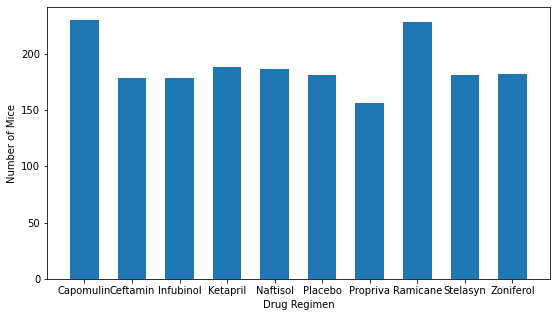

In [117]:
plt.figure(figsize=(9,5))
plt.bar(x_labels, counts, width=0.6, y)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

In [127]:
sex = cleaned.groupby(['Sex']).count()['Mouse ID']
sex

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

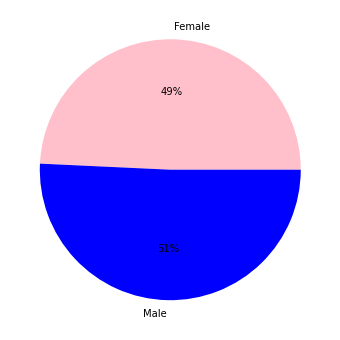

In [131]:
plt.figure(figsize = (6,6))
pie_labels = ['Female', 'Male']
pie_colors = ['Pink', 'Blue']

pie_num = sex

plt.pie(pie_num, labels = pie_labels, colors = pie_colors, autopct="%1.f%%",)
plt.show()